<a href="https://colab.research.google.com/github/Saitejamacha/nextjs/blob/main/LinearRegressionHandsOn4thMay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression HandsOn**

Dataset link: https://drive.google.com/file/d/1kZ3BpQAdNtlEd-1dTpVyt_MgmXpNiyFe/view?usp=sharing

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read my Data**

In [ ]:
insurance = pd.read_csv('/content/new_insurance_data.csv')
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


**Shape inspection**

In [ ]:
insurance.shape

(1338, 13)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
# Method chaining
insurance.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
# fill null values
col = list(insurance.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
insurance.smoker.mode()

,smoker
0,no


In [ ]:
insurance.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
for cname in col:
  if cname == 'children':
    insurance[cname] = insurance[cname].fillna(insurance[cname].mode()[0])
  elif insurance[cname].dtype =='object':
    insurance[cname] = insurance[cname].fillna(insurance[cname].mode()[0])
  else:
    insurance[cname] = insurance[cname].fillna(insurance[cname].mean())

In [ ]:
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


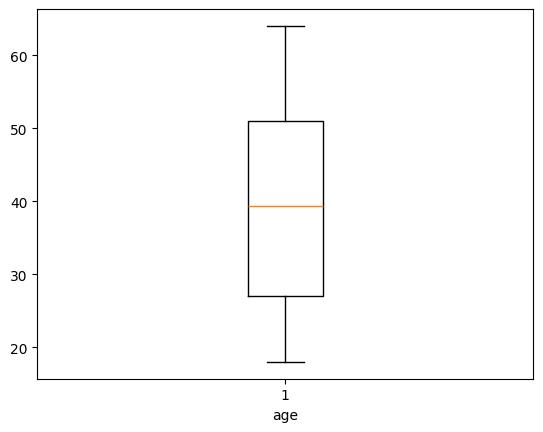

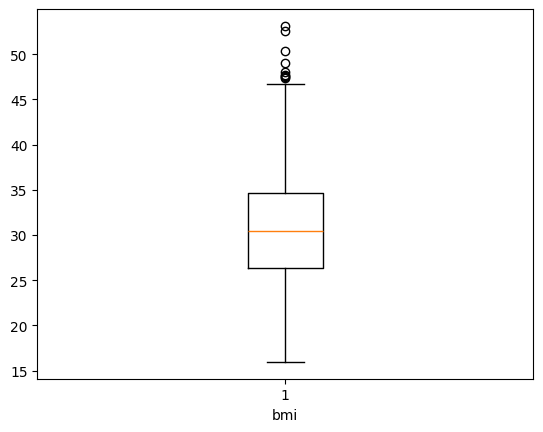

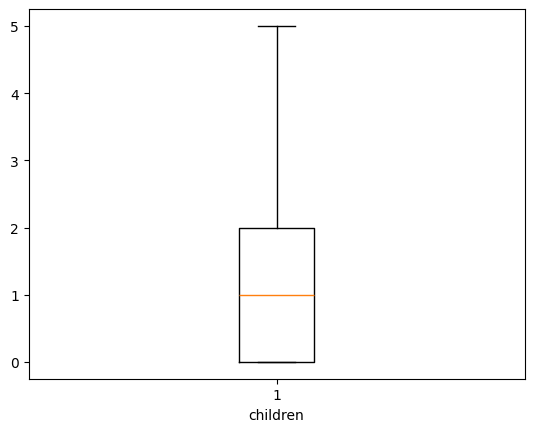

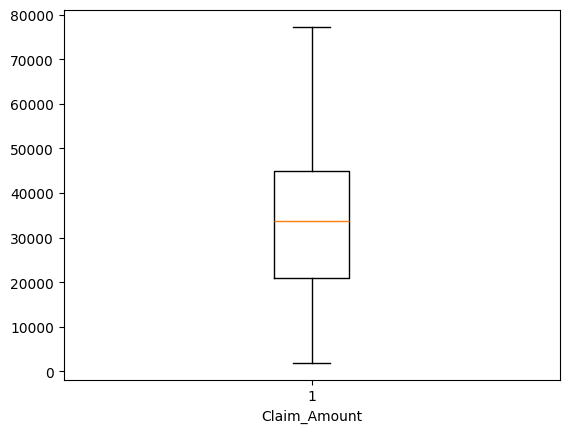

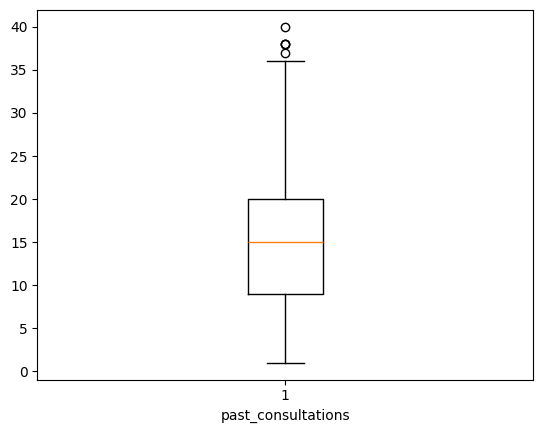

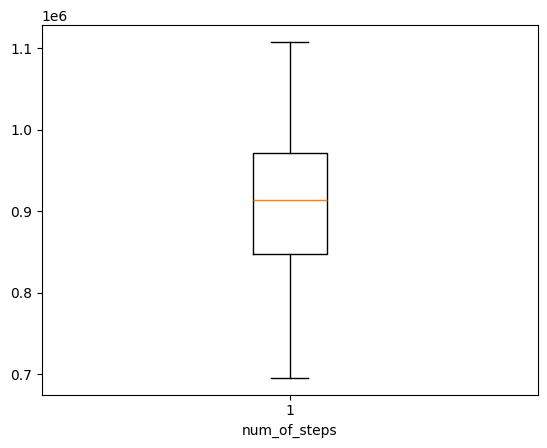

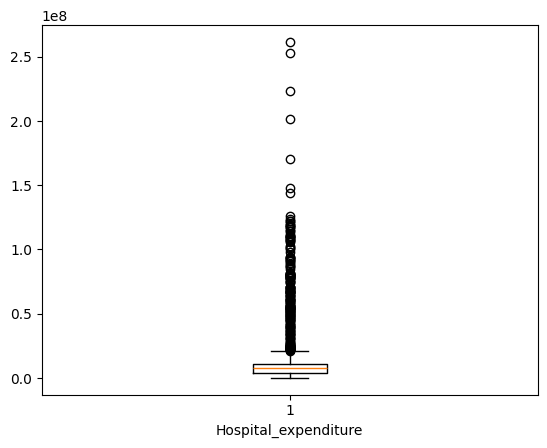

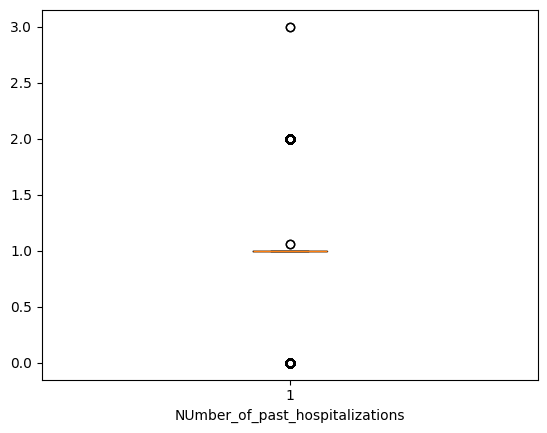

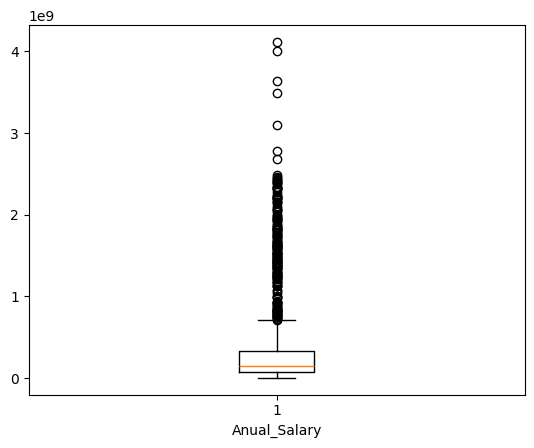

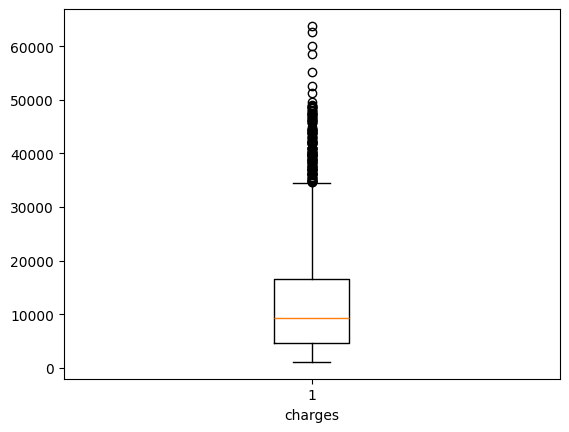

In [ ]:
# let detect outlier
for cname in col:
  if (insurance[cname].dtypes =='float64'):
    plt.boxplot(insurance[cname])
    plt.xlabel(cname)
    plt.show()

In [ ]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

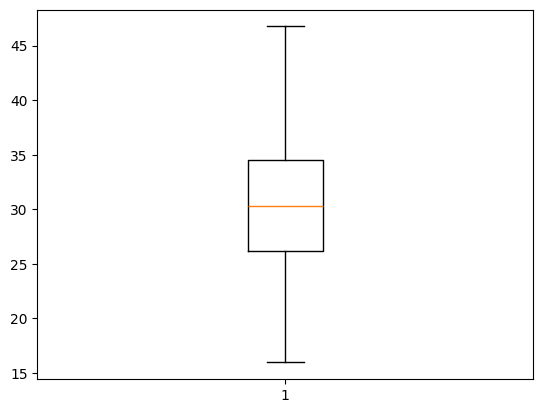

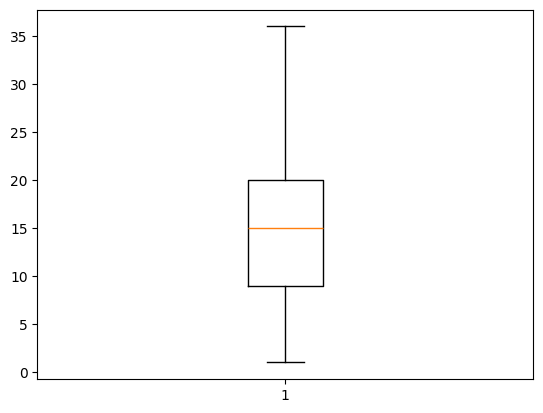

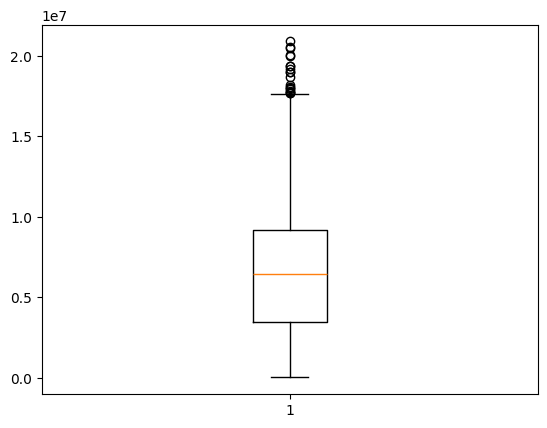

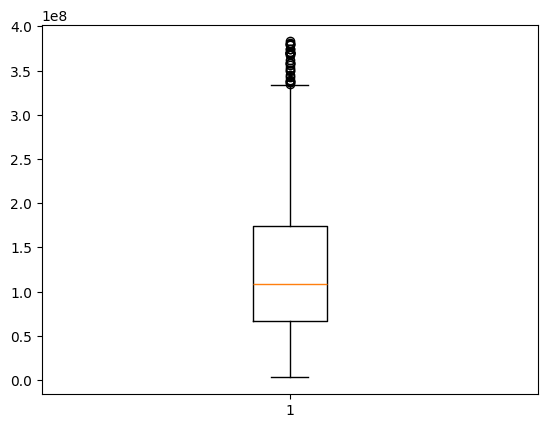

In [ ]:
columns = ['bmi','past_consultations','Hospital_expenditure','Anual_Salary']

for col in columns:
  Q1 = insurance[col].quantile(0.25)
  Q3 = insurance[col].quantile(0.75)
  IQR = Q3 - Q1
  lowerFence = Q1-(1.5*IQR)
  upperFence = Q3 +(1.5*IQR)
  insurance = insurance[(insurance[col] >= lowerFence) & (insurance[col]<=upperFence)]
  plt.boxplot(insurance[col])
  plt.show()

**Shape inspection after removing outliers**

In [ ]:
insurance.shape

(1030, 13)

In [ ]:
# insurace --- Corr()
numCols = insurance.select_dtypes(include = ['number'])
corrMat = numCols.corr()
corrMat

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.047664,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.003515,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.047664,0.003515,1.000000,0.044480,0.046549,0.229850,-0.005459,0.314249,0.067953,0.140763
Claim_Amount,0.117750,0.008343,0.044480,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.046549,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.229850,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.005459,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.314249,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.067953,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.140763,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


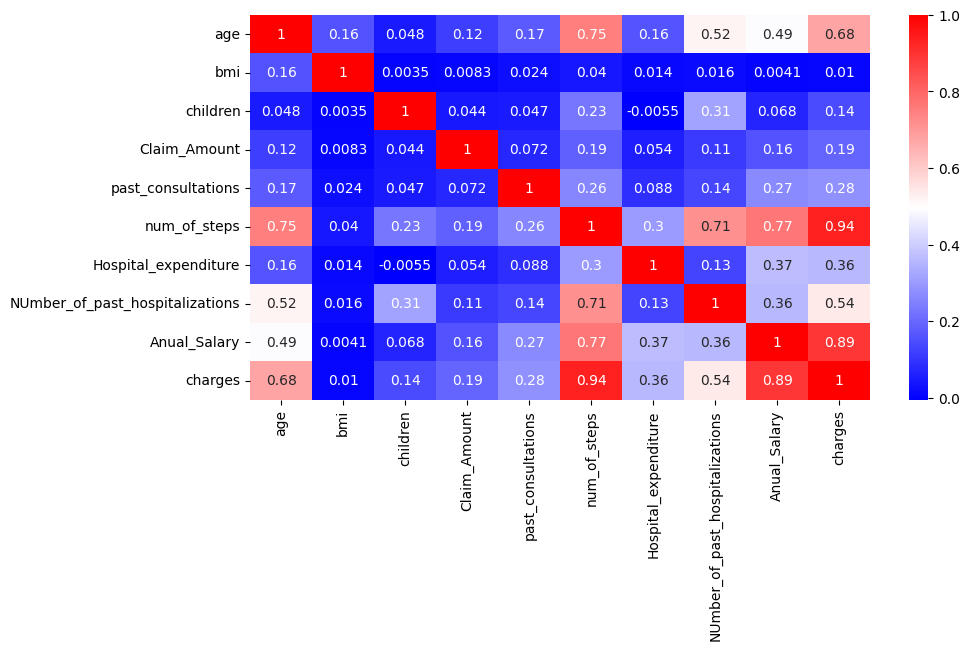

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(corrMat, annot = True, cmap = 'bwr')
plt.show()

**Insight**
* Charges is highly correlated with annual salary and number of steps
* Charges: The final bill or cost charged by the insurance provider

###**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = insurance.select_dtypes(include = ['object']).columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

###**Preprocessing:**
* Encoding
* Standardization
* Normalization
* Feature selection/ Feature elemination
* Feature Extraction
* Log Transformation

Documentation: https://scikit-learn.org/stable/api/sklearn.preprocessing.html

In [ ]:
le = LabelEncoder()
for col in cat_cols:
  insurance[col] = le.fit_transform(insurance[col])

In [ ]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2,19350.36890
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455


##**Split my data into training and testing set**

In [ ]:
x = insurance.drop('charges',axis = 1) #Independent column
y = insurance['charges']  # Dependent column / Target

In [ ]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=0) # 42 and 0

In [ ]:
x_train # Learning questions

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
746,55.0,1,27.645,0.0,0,25238.363470,11.0,935369.0,2.086869e+06,1.0,1.649883e+08,1
641,50.0,0,25.600,0.0,0,37222.476360,9.0,906234.0,6.062378e+06,1.0,9.657123e+07,3
999,19.0,1,26.030,1.0,1,30825.190070,11.0,953289.0,5.923489e+06,1.0,3.029514e+08,1
281,33.0,0,24.310,0.0,0,9560.754493,15.0,821360.0,3.185350e+06,1.0,7.490390e+07,2
802,52.0,0,38.380,2.0,0,12992.139950,24.0,933863.0,4.075903e+06,1.0,2.061268e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,30.0,0,32.400,1.0,0,20150.675120,9.0,832253.0,1.747107e+05,1.0,6.328892e+07,3
768,57.0,1,28.100,0.0,0,9582.708574,11.0,929888.0,1.046259e+07,1.0,1.850292e+08,3
841,58.0,1,30.305,0.0,0,31405.793590,12.0,939497.0,9.380141e+06,1.0,2.118739e+08,0
561,44.0,1,37.100,2.0,0,9816.604000,12.0,897353.0,8.134594e+05,1.0,1.287152e+08,3


In [ ]:
x_test # Exam question

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
752,55.0,0,30.500,0.0,0,33948.245030,14.0,937388.0,2852368.952,1.0,1.322794e+08,3
723,52.0,0,23.180,0.0,0,55314.076930,22.0,916140.0,8962514.811,1.0,1.811501e+08,0
177,18.0,0,32.120,2.0,0,5496.365185,7.0,797369.0,4728536.620,1.0,5.833210e+07,2
834,58.0,0,33.100,0.0,0,22778.601030,24.0,938607.0,5349680.612,1.0,2.223391e+08,3
718,50.0,0,23.540,2.0,0,11951.090250,4.0,912317.0,5368280.300,1.0,1.787119e+08,2
...,...,...,...,...,...,...,...,...,...,...,...,...
627,49.0,1,22.515,0.0,0,49140.254220,10.0,898863.0,4776407.417,1.0,9.172299e+07,0
993,64.0,0,39.050,3.0,0,20212.558840,16.0,969374.0,4530674.378,1.0,2.787266e+08,2
426,38.0,0,30.690,1.0,0,45637.390130,5.0,882082.0,9278303.409,1.0,6.394902e+07,2
895,59.0,1,29.700,2.0,0,12770.132490,24.0,959985.0,4895703.017,1.0,2.081729e+08,2


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression() # bulding the model

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred # My answer

array([10672.66615235, 10699.48386325,  2186.71843944, 12338.08676473,
       10192.74100055,  2658.92758265,  5427.76917978,  3469.40868331,
       -1236.6619221 ,   645.0721552 , 10735.98194008,  5502.95906946,
        4189.1308848 ,  8913.03978534,  6628.23856749,  7463.88289151,
        5465.59128213, 11980.58654103, 10057.06138848,  4165.71346257,
        6533.13678745,  8866.11979428,  6362.32221798, 12361.88152585,
        8793.45766218,  9370.88264127,  1829.13456184,  2874.31579777,
        7856.52326998,  5273.1754014 ,  9779.0590237 , 11670.3535151 ,
        9572.95453093,   415.63239494, 11262.29354608,  8954.37149456,
        1968.20051548,  4441.58664583,  9834.63495214,  2170.88590273,
        1099.16676768,  9634.9159147 , 11986.09267321,  5984.4641875 ,
        5766.88613662,  3159.04085965,  9702.45390998, 11240.25961007,
        1723.51673094,  1470.99298854, 12509.09381923, 11824.28414855,
       11102.1679759 ,  4156.06600589,  7673.94337002,  4858.23254848,
      

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [ ]:
rSquaredScore = r2_score(y_test,y_pred)

In [ ]:
rSquaredScore

0.9475711933381715

In [ ]:
root_mean_squared_error(y_test,y_pred)

956.2374246866269

##**BestFit Line**

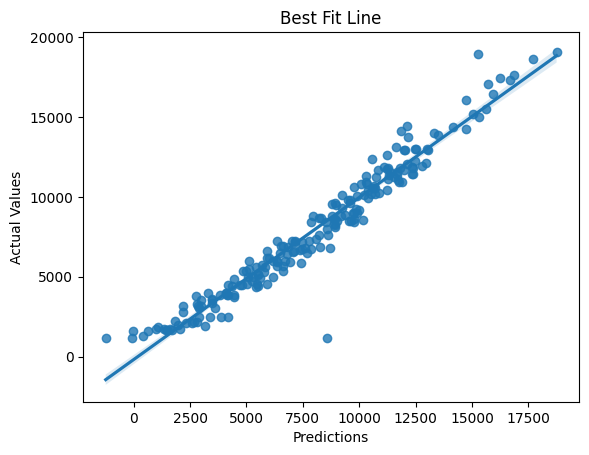

In [ ]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel('Predictions')
plt.title('Best Fit Line')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
model.coef_ # m Slope

array([ 3.74566416e+01, -8.83247439e+01, -3.37916158e+00,  1.42705061e+01,
        2.53351243e+03,  5.24390939e-04,  6.26993486e+00,  4.26663656e-02,
        1.95408421e-05, -1.56321488e+03,  1.55917161e-05, -2.60961456e+01])

In [ ]:
model.intercept_ #c

np.float64(-31861.602505917115)